In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
donations = pd.read_csv("donations.csv")
outcomes = pd.read_csv("outcomes.csv")
projects = pd.read_csv("projects.csv")
resources = pd.read_csv("resources.csv")
essays = pd.read_csv("essays.csv")
print("ready")

ready


In [3]:
# Create frequency counts for dummy outcome variables, including count of NaN values.
for var in outcomes.columns.values:
    if len(outcomes[var].unique()) < 4:
        print(var)
        print(outcomes[var].value_counts(dropna = False))
        print("")

# Most projects are not getting supported by teacher-referred donors, and
# most projects are receiving at least one large donation from a donor
# not referred by the teacher, indicating that the site is effectively
# connecting teachers to strangers and not just tapping existing networks of support. 
# There are a nontrivial number of missing values for most of the outcome variables.

is_exciting
f    582616
t     36710
Name: is_exciting, dtype: int64

at_least_1_teacher_referred_donor
f      400268
t      124660
NaN     94398
Name: at_least_1_teacher_referred_donor, dtype: int64

fully_funded
t    430683
f    188643
Name: fully_funded, dtype: int64

at_least_1_green_donation
t      378693
f      146235
NaN     94398
Name: at_least_1_green_donation, dtype: int64

great_chat
f    432156
t    187170
Name: great_chat, dtype: int64

three_or_more_non_teacher_referred_donors
t      272378
f      252550
NaN     94398
Name: three_or_more_non_teacher_referred_donors, dtype: int64

one_non_teacher_referred_donor_giving_100_plus
t      377809
f      147119
NaN     94398
Name: one_non_teacher_referred_donor_giving_100_plus, dtype: int64

donation_from_thoughtful_donor
f      517992
NaN     94398
t        6936
Name: donation_from_thoughtful_donor, dtype: int64



In [4]:
# make proportion output readable
pd.set_option('display.float_format', str.format('%.3f'))

# summarize categorical data on projects
import re
for var in projects.columns.values:
    # ignore variables that take more than 10 unique values:
    if len(projects[var].unique()) < 10:
        var_proportions = projects[var].value_counts()/len(projects[var])
        print(var)
        print(var_proportions)
        print("")
        
# It's interesting what a disproportionately high percentage of projects 
# are coming from TFA teachers and schools in specific charter networks.
# It's also interesting that more than 1/8 of the projects are coming from
# low- and moderate-poverty schools: it seems like these schools should be 
# able to fundraise from their own middle- and high-income parents.
# More than a quarter of projects feature a impacting-doubling match offer.

school_metro
urban      0.527
suburban   0.229
rural      0.121
Name: school_metro, dtype: float64

school_charter
f   0.913
t   0.087
Name: school_charter, dtype: float64

school_magnet
f   0.906
t   0.094
Name: school_magnet, dtype: float64

school_year_round
f   0.95
t   0.05
Name: school_year_round, dtype: float64

school_nlns
f   0.985
t   0.015
Name: school_nlns, dtype: float64

school_kipp
f   0.993
t   0.007
Name: school_kipp, dtype: float64

school_charter_ready_promise
f   0.995
t   0.005
Name: school_charter_ready_promise, dtype: float64

teacher_prefix
Mrs.         0.477
Ms.          0.395
Mr.          0.128
Dr.          0.000
Mr. & Mrs.   0.000
Name: teacher_prefix, dtype: float64

teacher_teach_for_america
f   0.943
t   0.057
Name: teacher_teach_for_america, dtype: float64

teacher_ny_teaching_fellow
f   0.983
t   0.017
Name: teacher_ny_teaching_fellow, dtype: float64

primary_focus_area
Literacy & Language   0.450
Math & Science        0.247
Music & The Arts      0.090
A

In [5]:
# Donations and Project Cost

# set to display dollar amounts
pd.set_option('display.float_format', str.format('%.2f'))

# How much does a typical project cost?
price_desc = projects['total_price_excluding_optional_support'].describe()
print("Project price (excluding optional support)")
print(price_desc)
print("")

# What size is a typical donation?
donation_desc = donations['donation_total'].describe()
print("Donation size")
print(donation_desc)
print("")

# How many donors donate to each project?
donor_counts = donations['projectid'].value_counts()
projects['donation_count'] = projects['projectid'].apply(
    lambda x: donor_counts.get(x,0))
print("Donations per project")
print(projects['donation_count'].describe())

# What proportion of projects acquire at least one donor?
print("")
print("Percent of projects with at least one donor: {:.3}".format(
        len(donor_counts)/len(projects.index)))

Project price (excluding optional support)
count     664098.00
mean         542.04
std        12677.38
min            0.00
25%          267.20
50%          411.00
75%          586.49
max     10250017.00
Name: total_price_excluding_optional_support, dtype: float64

Donation size
count   3097989.00
mean         76.68
std         270.49
min         -15.00
25%          10.00
50%          25.00
75%          56.11
max      169200.00
Name: donation_total, dtype: float64

Donations per project
count   664098.00
mean         4.66
std          7.70
min          0.00
25%          1.00
50%          2.00
75%          6.00
max        607.00
Name: donation_count, dtype: float64

Percent of projects with at least one donor: 0.791


Donations per project, by funding level
fully_funded       
f             count   188643.00
              mean         1.51
              std          3.27
              min          0.00
              25%          0.00
              50%          1.00
              75%          2.00
              max        200.00
t             count   430683.00
              mean         6.53
              std          8.76
              min          0.00
              25%          2.00
              50%          4.00
              75%          8.00
              max        607.00
dtype: float64


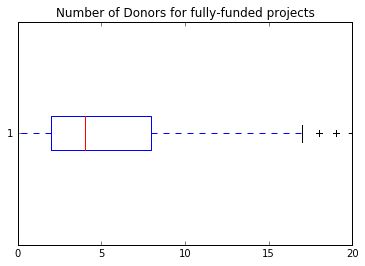

Fully-funded projects not associated with donations?: 364


In [6]:
# Donations and Project Cost, continued

# Break down donation count by whether or not projects were fully funded
projects_outcomes = projects.merge(outcomes,on='projectid',how='left')
print("Donations per project, by funding level")
print(projects_outcomes.groupby('fully_funded')['donation_count'].describe())

# Create box plot of number of donations for fully funded projects only
to_plot = projects_outcomes.groupby('fully_funded').get_group('t')['donation_count'].values
plt.figure()
plt.xlim(0,20)
plt.title("Number of Donors for fully-funded projects")
plt.boxplot(to_plot,vert=False)
plt.show()
# The median fully-funded project has only a few donors.
# The number of donations is extremely right-skewed and 
# the outliers extend far beyond the range of this plot. 

# Interestingly, there are 364 projects marked as fully funded that do not 
# seem to be associated with any donations in the donations data, which is odd, 
# even though it is only a small number of projects. This could indicate that 
# the donations data incomplete or that I am not interpreting either
# the fully_funded variable or the donations data correctly. 
x = 0
for index, project in projects_outcomes.iterrows():
    if project['fully_funded'] == 't' and project['projectid'] not in donor_counts:
        x += 1
print("Fully-funded projects not associated with donations?: {}".format(x))

In [7]:
# Grade level and resources requested

# How many projects are being requested for each grade level?
print(projects.groupby('grade_level').size())

# What kinds of resources are schools are requesting for these different grade levels?
resources_by_grade_pr =  pd.crosstab(index=projects['grade_level'],
            columns=projects['resource_type']).apply(
            lambda row: row/row.sum(),axis=1)
resources_by_grade_pr
# Requests for older students are more likely to be requests for technology 
# and books, while requests for younger students are more likely to be for 
# suppies and uncategorized resources.

grade_level
Grades 3-5       204443
Grades 6-8       114539
Grades 9-12       98989
Grades PreK-2    246118
dtype: int64


resource_type,Books,Other,Supplies,Technology,Trips,Visitors
grade_level,,,,,,
Grades 3-5,0.22,0.10,0.33,0.33,0.01,0.0
Grades 6-8,0.24,0.07,0.33,0.35,0.01,0.0
Grades 9-12,0.22,0.06,0.31,0.40,0.01,0.0
Grades PreK-2,0.19,0.14,0.38,0.28,0.00,0.0


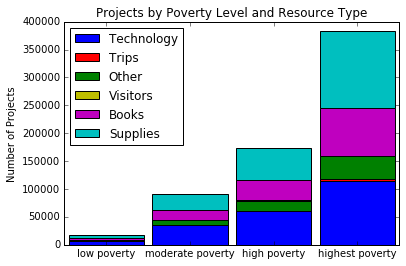

In [8]:
# Poverty level and resources requested 

# Create bar graph showing how many projects are being requested
# by schools of each poverty level, and what types of resources
# are being requested by these schools

resources_by_poverty = pd.crosstab(index=projects['poverty_level'],
            columns=projects['resource_type'])

# hard code list of poverty levels in order to get desired order in graph
levels = ['low poverty','moderate poverty','high poverty','highest poverty']

# Create dictionary of lists of number of projects requesting each resource 
# by poverty level with resource types as keys
to_plot = {}
for resource in resources_by_poverty.columns.values:
    to_plot[resource] = []
    for level in levels:
        to_plot[resource].append(resources_by_poverty[resource][level])

# Get colors
from itertools import cycle
cycol = cycle('brgymc')

width = 0.9
bar_pos = [i+1.05 for i in range(len(to_plot['Books']))]
tick_pos = [i+(width/2) for i in bar_pos]
bottom = np.array([0]*len(levels))

# Create stacked bar graph
plt.figure()
for resource in to_plot:
    plt.bar(bar_pos,to_plot[resource],width=width,
            label=resource,color=next(cycol),
            bottom=bottom)
    # reset base for next resource type to be added above
    bottom = bottom + np.array(to_plot[resource])
    
plt.ylabel('Number of Projects')
plt.title('Projects by Poverty Level and Resource Type')
plt.xticks(tick_pos,levels)
plt.legend(loc='upper left')

plt.show()

In [9]:
pd.crosstab(index=projects['school_metro'],
            columns=projects['poverty_level']).apply(
            lambda row: row/row.sum(),axis=1)
# Urban schools that submit requests are most likely to be highest poverty,
# while suburban schools are least likely to be highest poverty schools. 

poverty_level,high poverty,highest poverty,low poverty,moderate poverty
school_metro,,,,
rural,0.40,0.37,0.02,0.21
suburban,0.29,0.44,0.05,0.22
urban,0.19,0.71,0.01,0.08


In [10]:
# Merge essay data with projects_outcomes
projects_complete = projects_outcomes.merge(essays,on='projectid',how='left')

#Are there are any particularly generic project titles? 

# Recode projects that don't have titles as having title ''
for i in range(len(projects_complete['title'])):
    if type(projects_complete['title'][i]) != str:
        projects_complete['title'][i] = ''
        
title_counts = projects_complete['title'].value_counts()
common_titles = title_counts[title_counts>200]
print("Most Common Titles")
print(common_titles)

# Is project title uniqueness correlated with likelihood of being fully funded? Very slightly
projects_complete['frequency_of_title'] = projects_complete['title'].apply(
    lambda x: int(title_counts[x]))
projects_complete['fully_funded'] = projects_complete['fully_funded'].map({'t': 1, 'f': 0})

print("Correlation between title uniqueness and fully_funded: {:.2}".format(
        projects_complete['frequency_of_title'].corr(-projects_complete['fully_funded'])))

# Is length of teacher statement correlated with likelihood of being fully funded? Very slightly
projects_complete['essay_len'] = projects_complete['essay'].str.len()

print("Correlation between length of essay and fully_funded: {:.2}".format(
    projects_complete['essay_len'].corr(projects_complete['fully_funded'])))

Most Common Titles
Can You Hear Me Now?                   574
Listening Center                       560
Listen Up!                             480
Classroom Library                      478
Technology in the Classroom            377
Do You Hear What I Hear?               354
Lights, Camera, Action!                290
Picture This!                          261
Listen and Learn                       219
A Picture is Worth a Thousand Words    215
Classroom Supplies                     209
Teaching with Technology               207
Let's Get Organized!                   205
Name: title, dtype: int64
Correlation between title uniqueness and fully_funded: 0.011
Correlation between length of essay and fully_funded: 0.0095


In [11]:
# Data story
# How has the role of DonorsChoose changed over time? 
# Do data collection practices appear to have changed in ways that might be 
# relevant in creating a model of fully_funded?

In [12]:
# Create a new table, years, which will summarize some major trends over time. 
projects_complete['year'] = projects_complete['date_posted'].str[:4].apply(int)
years = projects_complete.year.value_counts().reset_index()
years.columns = ['year', 'project_count']
years = years.sort_values(by='year', ascending=1)

def add_tf_columns_to_years(col, years):
    '''
    Append two columns to years, described below.
    
    Inputs: 
        col: name of 't'/'f' column in projects or outcomes
        years: years data frame generated above
        
    Returns: years dataframe with two appended columns: 
        [col]_count: number of t's in each year in col
        percent_[col]: percentage of observations that take 't' value in col
    '''
    # Recode col from string to integer to make aggregation possible
    if 't' in projects_complete[col].unique():
        projects_complete[col] = projects_complete[col].map({'t': 1, 'f': 0})
    
    # Create column in years containing count of projects taking col value 't'
    col_by_year = pd.DataFrame(projects_complete.groupby(['year'])[col].sum().reset_index())
    col_by_year.columns = ['year', col+"_count"]
    years = years.merge(col_by_year, on='year', how='left')
    
    # Create column in years showing percent of projects taking col value 't'
    years["percent_"+col] = years[col+"_count"]/years['project_count']*100
    
    return years

for col in ['fully_funded','great_chat','is_exciting', 'teacher_teach_for_america','school_charter','school_nlns','eligible_double_your_impact_match']:
    years = add_tf_columns_to_years(col, years)

None

Average students served per project
year
2002     0.16
2003     1.61
2004    69.88
2005    89.83
2006   101.84
2007    85.28
2008   115.03
2009   102.02
2010   106.02
2011    92.33
2012    94.10
2013    95.74
2014    94.38
Name: students_reached, dtype: float64


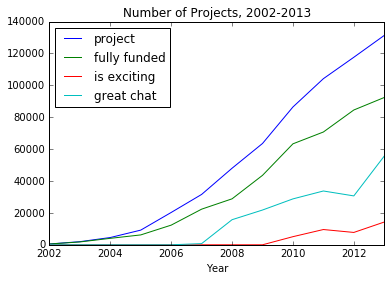

In [13]:
# Has the average number of students served changed over time?
print("Average students served per project")
print(projects_complete.groupby('year')['students_reached'].mean())

# It appears that students served was not a required field for projects 
# until around 2004-2005 or that many teachers were entering 0 in this field, 
# so it would not make sense to include observations from before 2005 in 
# the training data for a model that uses number of students served.

# Plot growth in projects and positive outcomes over time
plt.figure()
X = years['year']

for col in ['project_count','fully_funded_count','is_exciting_count','great_chat_count']:
    Y = years[col]
    plt.plot(X,Y,linestyle='-',label=" ".join(col.split("_")[:-1]))

plt.xlim(2002,2013)
plt.xlabel('Year')
plt.title("Number of Projects, 2002-2013")
plt.legend(loc='upper left')
plt.show()

# The number of projects submitted annually has grown steadily each year from 2002-2013.
# The project data stops in the first quarter of 2014. 

# Data does not exist for some outcome variables before 2010, 
# likely because associated site features or classifications did not yet exist. 
# For example, no projects were classed as exciting before 2010, and none
# have great_chat values of 't' before 2007.
# Projects from 2014 are not yet associated with outcome data.

# Based on these observations, it might be most useful to limit the observations in
# our training data for a model predicting fully_funded to the period 2010-2013.

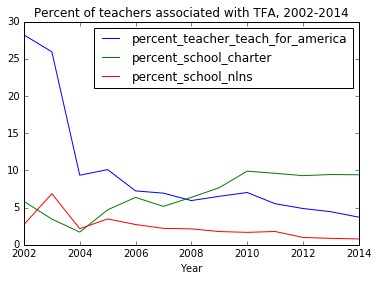

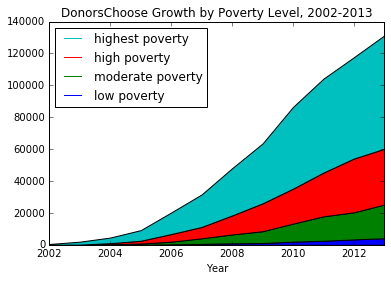

poverty_level,high poverty,highest poverty,low poverty,moderate poverty
year,,,,
2002,0.03,0.90,0.06,0.01
2003,0.03,0.94,0.02,0.01
2004,0.16,0.77,0.01,0.05
2005,0.19,0.72,0.02,0.07
2006,0.24,0.67,0.01,0.08
2007,0.23,0.65,0.02,0.11
2008,0.25,0.62,0.02,0.12
2009,0.28,0.59,0.02,0.12
2010,0.25,0.59,0.02,0.13


In [14]:
# Changes in users 

# Sources of requests 2002-2014
plt.figure()
X = years['year']
Y = years['percent_teacher_teach_for_america']
Y2 = years['percent_school_charter']
Y3 = years['percent_school_nlns']
plt.plot(X,Y,linestyle='-')
plt.plot(X,Y2,linestyle='-')
plt.plot(X,Y3,linestyle='-')
plt.xlim(2002,2014)
plt.xlabel('Year')
plt.title("Percent of teachers associated with TFA, 2002-2014")
plt.legend(loc='upper right')
plt.show()
# The proportion of teachers listing projects on the site who were associated 
# with TFA and public NLNS schools was initally extraordinarily high. As the site 
# has grown, they have fallen but remain disproportionately high compared with
# the population of all public schools and even high-poverty public schools.

# In general, the number of requests from charter schools has grown faster
# than the number of requests from other sources. 


# Add project count by poverty level to years
levels = projects_complete['poverty_level'].unique()
for level in levels:
    projects_complete[level] = np.where(projects_complete['poverty_level']==level, 1, 0)
    years = add_tf_columns_to_years(level, years)

# Break down DonorsChoose growth by poverty level served
plt.figure()
X = years['year']
y1 = years['low poverty_count']
y2 = years['moderate poverty_count'] 
y3 = years['high poverty_count'] 
y4 = years['highest poverty_count']
plt.stackplot(X, y1, y2, y3, y4)
plt.plot([],[],label='highest poverty',color='c')
plt.plot([],[],label='high poverty',color='r')
plt.plot([],[],label='moderate poverty',color='g')
plt.plot([],[],label='low poverty',color='b')

plt.xlim(2002,2013)
plt.xlabel('Year')
plt.title("DonorsChoose Growth by Poverty Level, 2002-2013")
plt.legend(loc='upper left')
plt.show()

pd.crosstab(index=projects_complete['year'],
            columns=projects_complete['poverty_level']).apply(
            lambda row: row/row.sum(),axis=1)

# While the site originally served nearly exclusively highest-poverty schools, 
# as DonorsChoose has grown, it has hosted more projects from high- 
# and moderate-poverty schools. 

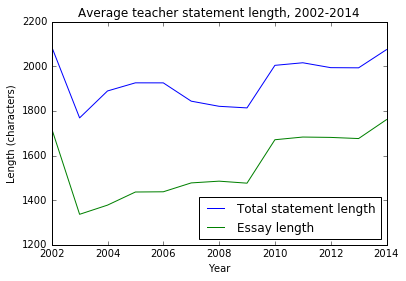

In [15]:
# Have the teacher statements changed in length over time?
projects_complete['app_len'] = projects_complete['essay'].str.len() + \
    projects_complete['short_description'].str.len() + \
    projects_complete['need_statement'].str.len()

avg_app_len = pd.DataFrame(projects_complete.groupby('year')['app_len'].mean().reset_index())
avg_app_len.columns = ['year','avg_app_len']
years = years.merge(avg_app_len, on='year', how='left')

avg_essay_len = pd.DataFrame(projects_complete.groupby('year')['essay_len'].mean().reset_index())
avg_essay_len.columns = ['year','avg_essay_len']
years = years.merge(avg_essay_len, on='year', how='left')

# Plot teacher statement length over time
plt.figure()
X = years['year']
Y = years['avg_app_len']
Y2 = years['avg_essay_len']
plt.plot(X,Y,linestyle='-',label='Total statement length')
plt.plot(X,Y2,linestyle='-',label='Essay length')
plt.xlim(2002,2014)
plt.ylim(1200,2200)
plt.xlabel('Year')
plt.ylabel('Length (characters)')
plt.title("Average teacher statement length, 2002-2014")
plt.legend(loc='lower right')
plt.show()
# The average length of the project descriptions has generally increased over time, 
# excluding 2002, when there very few projects and each request was very long. 

In [16]:
'''
Questions
1. How do donors typically find projects on the site to donate to if they are not 
        referred by a particular teacher? What are the most commonly used search 
        filters and options? What algorithms decide which projects are featured 
        on the front page and which projects come up when a user clicks 
        ‘Pick a project for me’?
2. Site development over time: Why are no projects classed as exciting until 2010? 
        Did the associated features/classifications for which data is missing
        not yet exist or were they just not tracked?
3. Do foundations and other partners hand-select which projects to match donations for? 
        If not, what algorithms factor into this process? Which projects receive 
        match offers is likely determined based on the same sorts of considerations 
        that affect donor decisions. Does DonorsChoose make suggestions about which 
        projects or categories to match donations for and, if so, what are these 
        suggestions? 
4. More school- and teacher-level data: 
        It might be useful for the site to collect more teacher- and school-level data, 
        such as how long long the teacher has been teaching, how long the teacher has 
        taught at this particular school, and additional demographic information about
        the school, such as its racial composition.
        With more time, it would be interesting to link project requests and outcomes 
        to other school-level data on student achievement, growth, and funding per student 
        and district-level data on school funding model and property taxes. 
'''
None

In [17]:
import statsmodels as sm
import statsmodels.discrete.discrete_model as smd

# Restrict data to projects posted 2010-2012
recent_projects = projects_complete
for year in range(2002,2010):
    recent_projects = recent_projects[projects_complete.year != year]
recent_projects = recent_projects[projects_complete.year != 2013]
projects_2014 = projects_complete[projects_complete.year == 2014]
    
endog = np.array(recent_projects['fully_funded'].values)
x1 = np.array(recent_projects['great_chat'].values)
x2 = np.array(recent_projects['eligible_double_your_impact_match'].values)
x3 = np.array(recent_projects['moderate poverty'].values)
x4 = np.array(recent_projects['high poverty'].values)
x5 = np.array(recent_projects['highest poverty'].values)
exog = np.vstack((x1,x2,x3,x4,x5)).transpose()
exog = sm.tools.tools.add_constant(exog)

model = smd.Probit(endog,exog,missing='drop')
model.data.xnames = ['constant', 'great_chat', 'eligible_double_your_impact_match', 
                     'moderate poverty', 'high poverty', 'highest poverty']
results = model.fit(maxiter=50)
print(results.summary())
# This is a very basic probit model, but we find that we can reject the 
# null hypotheses that great_chat, association with a donation match, 
# and poverty level were not predictive of achieving full funding 
# between 2010 and 2013. 

# Predict probabilities for 2014 projects
x1 = np.array(projects_2014['great_chat'].values)
x2 = np.array(projects_2014['eligible_double_your_impact_match'].values)
x3 = np.array(projects_2014['moderate poverty'].values)
x4 = np.array(projects_2014['high poverty'].values)
x5 = np.array(projects_2014['highest poverty'].values)
exog = np.vstack((x1,x2,x3,x4,x5)).transpose()
exog = sm.tools.tools.add_constant(exog)
projects_2014['predicted'] = results.predict(exog)

Optimization terminated successfully.
         Current function value: 0.593079
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:               308270
Model:                         Probit   Df Residuals:                   308264
Method:                           MLE   Df Model:                            5
Date:                Wed, 15 Mar 2017   Pseudo R-squ.:                 0.01618
Time:                        04:31:32   Log-Likelihood:            -1.8283e+05
converged:                       True   LL-Null:                   -1.8584e+05
                                        LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
constant                              0.3855      0.015     25